# Employee Attrition Linear Regression Model Training

This notebook trains a linear regression model to predict **MonthlyIncome** based on employee features from the HR Employee Attrition dataset.

## Steps:
1. Load and explore the dataset
2. Handle missing data
3. Encode categorical variables
4. Select features and target variable
5. Scale the features
6. Split the data
7. Train the linear regression model
8. Evaluate the model
9. Save the model and scaler


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## Step 1: Load the Dataset


In [2]:
# Load the dataset
data_path = '../hr_employee_attrition.csv'
data = pd.read_csv(data_path)

print(f"Dataset shape: {data.shape}")
print(f"\nFirst few rows:")
data.head()


Dataset shape: (1470, 35)

First few rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Step 2: Data Exploration


In [3]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum().sum())
print("\nData types:")
print(data.dtypes)
print("\nDataset info:")
data.info()


Missing values:
0

Data types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel        

In [4]:
# Check basic statistics for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
print("Numeric columns statistics:")
data[numeric_cols].describe()


Numeric columns statistics:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Step 3: Handle Missing Data and Preprocessing


In [5]:
# Create a copy for preprocessing
df = data.copy()

# Drop columns that are not useful for prediction (IDs, constants)
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print(f"Shape after dropping columns: {df.shape}")


Shape after dropping columns: (1470, 31)


In [6]:
# Handle missing values - fill with median for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    else:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

print(f"Missing values remaining: {df.isnull().sum().sum()}")


Missing values remaining: 0


## Step 4: Encode Categorical Variables


In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

# Create a dictionary to store label encoders (for reference if needed later)
label_encoders = {}

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values")

print("\nFirst few rows after encoding:")
df.head()


Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
OverTime: 2 unique values

First few rows after encoding:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Step 5: Feature Selection and Target Variable


In [8]:
# Set target variable: MonthlyIncome
target = 'MonthlyIncome'

# Features: all columns except target
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")
print(f"\nTarget variable statistics:")
print(y.describe())


Features shape: (1470, 30)
Target shape: (1470,)

Features: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Target variable statistics:
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [9]:
# Check correlation with target variable
correlation_with_target = df.corr()[target].sort_values(ascending=False)
print("Correlation with MonthlyIncome:")
print(correlation_with_target)


Correlation with MonthlyIncome:
MonthlyIncome               1.000000
JobLevel                    0.950300
TotalWorkingYears           0.772893
YearsAtCompany              0.514285
Age                         0.497855
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
NumCompaniesWorked          0.149515
Education                   0.094961
Department                  0.053130
MonthlyRate                 0.034814
BusinessTravel              0.034319
WorkLifeBalance             0.030683
RelationshipSatisfaction    0.025873
DailyRate                   0.007707
OverTime                    0.006089
StockOptionLevel            0.005408
EnvironmentSatisfaction    -0.006259
JobSatisfaction            -0.007157
JobInvolvement             -0.015271
HourlyRate                 -0.015794
DistanceFromHome           -0.017014
PerformanceRating          -0.017120
TrainingTimesLastYear      -0.021736
PercentSalaryHike          -0.027269
Gender

## Step 6: Feature Scaling


In [10]:
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Scaled features shape:", X_scaled_df.shape)
print("\nScaled features statistics:")
X_scaled_df.describe()


Scaled features shape: (1470, 30)

Scaled features statistics:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.803741,0.501421,0.630272,0.292590,0.478231,0.449524,0.573923,0.600000,0.512731,0.576644,0.265986,0.557313,0.576190,0.548639,0.490629,0.299244,0.282993,0.300680,0.153741,0.570748,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.367863,0.332727,0.288840,0.263896,0.289531,0.256041,0.266274,0.364361,0.490065,0.290420,0.237187,0.276735,0.307728,0.367615,0.365060,0.285797,0.277557,0.450606,0.261424,0.360824,0.360403,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.500000,0.259843,0.500000,0.035714,0.250000,0.200000,0.333333,0.000000,0.257143,0.333333,0.000000,0.250000,0.333333,0.500000,0.239028,0.111111,0.000000,0.071429,0.000000,0.333333,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.000000,1.000000,0.501074,0.500000,0.214286,0.500000,0.400000,0.666667,1.000000,0.514286,0.666667,0.250000,0.625000,0.666667,0.500000,0.487513,0.222222,0.000000,0.214286,0.000000,0.666667,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.000000,1.000000,0.755190,1.000000,0.464286,0.750000,0.600000,1.000000,1.000000,0.767857,0.666667,0.500000,0.875000,1.000000,1.000000,0.737503,0.444444,1.000000,0.500000,0.000000,1.000000,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 7: Split the Data


In [11]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Training set size: 1176
Testing set size: 294
Training features shape: (1176, 30)
Testing features shape: (294, 30)


## Step 8: Train the Linear Regression Model


In [12]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model coefficients: {len(model.coef_)}")
print(f"Model intercept: {model.intercept_:.2f}")


Model trained successfully!
Model coefficients: 30
Model intercept: 2586.83


## Step 9: Evaluate the Model


In [13]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"R² Score (Percentage): {r2*100:.2f}%")


Model Evaluation Metrics:
Mean Squared Error (MSE): 2268297.53
Root Mean Squared Error (RMSE): 1506.09
Mean Absolute Error (MAE): 1162.95
R² Score: 0.8962
R² Score (Percentage): 89.62%


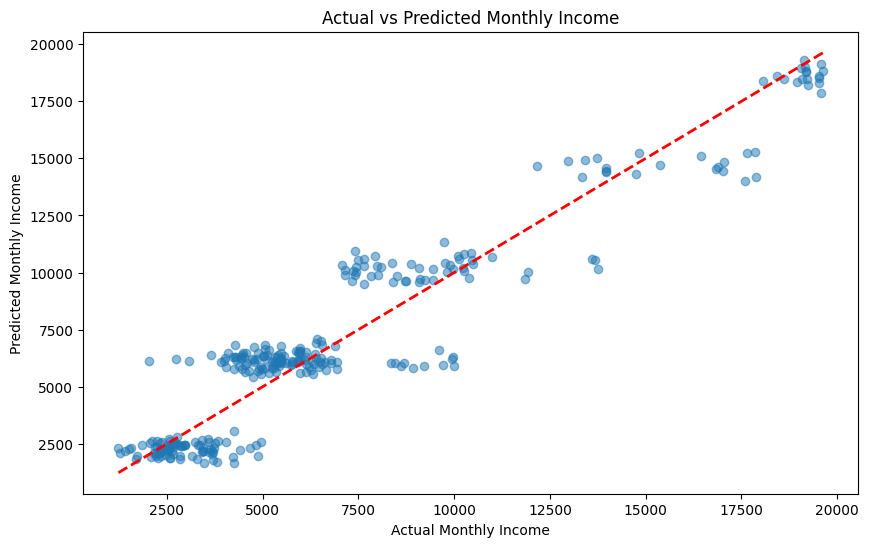

In [14]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Actual vs Predicted Monthly Income')
plt.show()


## Step 10: Save the Model and Scaler


In [15]:
# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model
model_path = 'models/employee_income_model.joblib'
joblib.dump(model, model_path)
print(f"Model saved to: {model_path}")

# Save the scaler
scaler_path = 'models/employee_income_scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")

# Save feature names for reference
import json
feature_names_path = 'models/feature_names.json'
with open(feature_names_path, 'w') as f:
    json.dump(list(X.columns), f)
print(f"Feature names saved to: {feature_names_path}")

# Save label encoders for categorical columns (if needed for prediction)
label_encoders_path = 'models/label_encoders.joblib'
joblib.dump(label_encoders, label_encoders_path)
print(f"Label encoders saved to: {label_encoders_path}")

print("\nAll files saved successfully!")


Model saved to: models/employee_income_model.joblib
Scaler saved to: models/employee_income_scaler.joblib
Feature names saved to: models/feature_names.json
Label encoders saved to: models/label_encoders.joblib

All files saved successfully!
